# Homework 3
## Due Date:  Thursday, October 4th at 11:59 PM
### There are 3 parts to this homework.
   [Problem 1](#p1) Writing a Linear regression class using Object Oriented Programming (OOP) paradigm [40pts]<br>
   [Problem 2](#p2) Toy module [10pts] <br>
   [Problem 3](#p3) Writing Bank Account software using Object Oriented Programming (OOP) paradigm [50pts]
    
---

<a id='p1'></a>
## Problem 1:  Linear Regression Class [40pts]

In this problem, you will create custom `Python` classes for two related types of linear regression: Ordinary Least Squares Linear Regression and Ridge Regression.

You are prohibited from using standard regression libraries in `Python` such as `sklearn`.  These classes must be your own.  However, you *are* permitted to check your answers against standard libraries.

### Background

Consider the multivariate linear model:
$$y = X\beta + \epsilon$$
where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$ is a $p$ length vector of coefficients.

The goal is to find the coefficients $\beta$ so that the linear model fits the data the best.  There are many approaches to this, but in this problem you will only consider two.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta X\|^{2}.$$

The best fit coefficients are given by:

$$\widehat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an $L_{2}$ regularization so the new cost function is:

$$\|y - \beta X\|^{2}+\|\Gamma \beta \|^{2}.$$

where $\Gamma = \alpha I$ for some constant $\alpha$ and $I$ is the identity matrix.

The best fit coefficients for this case are given by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty.$$

#### $R^2$ score
You will use the [$R^{2}$ metric](https://en.wikipedia.org/wiki/Coefficient_of_determination) to assess the performance of the models.  The $R^2$ score is defined as:
$$\displaystyle R^{2} = 1-\dfrac{SS_{E}}{SS_{T}}$$
where
$$SS_{T}=\sum_{i}{\left(y_{i}-\overline{y}\right)^2}$$ and $$SS_{E}=\sum_{i}{\left(y_{i} - \widehat{y_i}\right)^2}.$$

The ${y_i}$ are the original data values, $\widehat{y_i}$ are the predicted values, and $\overline{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

`__init__()`: Initializez an empty dictionary called `params`.

`fit(X, y)`: Fits linear model to $X$ and $y$.  Stores best-fit parameters in the dictionary attribute called `params`.  The first key should be the coefficients (not including the intercept) and the second key should be the intercept.

`get_params()`: Returns $\widehat{\beta}$ for the fitted model.  Note that the `fit` method already stored the dictionary in `params`, so all you need to do is return that dictionary.

`predict(X)`: Predict new values with the fitted model given $X$.

`score(X, y)`: Returns the $R^2$ value of the fitted model.

`set_params()`: Manually set parameters of the linear model.  The method should accept variable keyword arguments (`**kwargs`) containing model parameters.  In this problem, it will be used to set the reguarization coefficient $\alpha$ in the ridge regression model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

Here is the interface for the `Regression` class:

In [1]:
import numpy as np
class Regression(object):
    
    # initialize a parameter dict
    def __init__(self):
        self.params = dict()
    
    # returning the parameters
    def get_params(self):
        return self.params
    
    # set params by updating dictionary
    def set_params(self, **kwargs):
        self.params.update(kwargs)
        
    def fit(self, X, y):
        raise NotImplementedError
       
    # return the predicted y following the formula
    def predict(self, X):
        return X @ self.params['coefficients'] + self.params['intercept']
        
    # calculating score
    def score(self, X, y):
        mean_y = np.mean(y)
        sst = np.sum((y - mean_y) ** 2)
        predict_y = self.predict(X)
        sse = np.sum((np.subtract(y, predict_y)) ** 2)
        return 1 - (sse / sst)

### Part 2: OLS Linear Regression

Write a class called `LinearRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

**Hints:**
* Note that the linear model $\beta X$ can also include an intercept term (e.g. $\displaystyle \beta_{1} x_{1} + \beta_{0}$).  This is handled by appending a column of ones to the feature matrix $X$.  See the [`numpy.append`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html) documentation.  You may want to consider doing the append inside your `fit` method.
* The best-fit coefficients $\widehat{\beta}$ are determined by forming the inverse of $\displaystyle X^{T}X$.  Rather than using the `numpy.linalg.inv` method, it would be better to use the [pseudo-inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [2]:
class LinearRegression(Regression):
    
    def fit(self, X, y):
        
        # appending column of ones to the end of X for intercept
        X = np.append(X, [[1]] * len(X), 1)
        
        # calculating best-fit coefficients
        coeffs = np.linalg.pinv(X.T @ X) @ (X.T @ y)
        intercept = coeffs[-1]
        self.set_params(coefficients = coeffs[0:-1], intercept = intercept)

### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `LinearRegression` class.

In [3]:
class RidgeRegression(LinearRegression):
    
    def __init__(self, alpha):
        # first initialize a dict
        super(RidgeRegression, self).__init__()
        self.set_params(alpha = alpha)
        
    def fit(self, X, y):
        
        # appending column of ones to the end of X for intercept
        X = np.append(X, [[1]] * len(X), 1)
        
        # calculating X_tranpose X
        xtx = X.T @ X
        
        # creating the identity matrix based on the shape of X_transpose times X multiplied with alpha
        i = np.identity(len(xtx)) * self.params['alpha']
        
        # multiplying the gamma_transpose times gamma
        gtg = i.T @ i
        
        # calculating best-fit coefficients
        coefficients = np.linalg.pinv(xtx + gtg) @ (X.T @ y)
        intercept = coefficients[-1]
        self.set_params(coefficients = coefficients[0:-1], intercept = intercept)

### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the two models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.

**Note 1:** Some of you may not be familiar with the train-test split pattern from the statistics world.  All this means is that you take your dataset and split it into two parts, a training part and test part (often 80-20 split).  You perform the analysis on the training data in order to determine the best-fit parameters in your model.  Then, you use that model to make a prediction using data from the test set.  Finally, you assess the performance of the model on the test set.

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method.  Use an $\alpha$ value of 0.1.

**Hint:**  The code below demonstrates how to do a train-test split.  It also demos the way a user should interact with your classes.  Note that the demo uses the diabetes dataset, which you should change to the Boston dataset. 

In [4]:
import numpy as np
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# changing .load_diabetes to .load_boston
dataset = datasets.load_boston()
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], 
                                                    dataset['target'], 
                                                    test_size=0.2, 
                                                    random_state=42)

alpha = 0.1
models = [LinearRegression(),
          RidgeRegression(alpha)]

for model in models:
    model.fit(X_train, y_train)
    print (model.score(X_test, y_test))

0.6684825753971422
0.6678550672649411


### Part 5: Visualize Model Performance

Evaluate how the models perform for various values of $\alpha$.
* Calculate the $R^2$ scores for each model 
* Use $\alpha \in [0.05, 1]$ for the Ridge regression model
* Plot the two lines on the same graph.
* To change the parameters, use the `set_params()` method that you wrote.

**Be sure to create a readable and interpretable plot!**.  This means axes labels should be present and readable and the plot should have a legend.

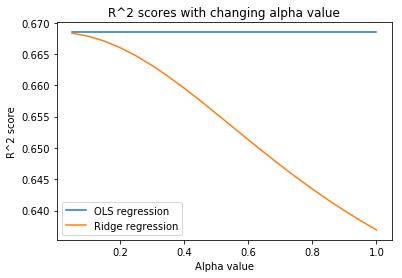

In [5]:
# lists for storings scores for every alpha
lin_scores = []
ridge_scores = []

# trying alpha in increments of 0.05
for a in np.arange(0.05, 1.05, 0.05):
    # set alpha for each regression model defined in the previous cell
    [x.set_params(alpha = a) for x in models]
    
    # train and test the models, and append scores to respective lists
    models[0].fit(X_train, y_train)
    lin_scores.append(models[0].score(X_test, y_test))
    models[1].fit(X_train, y_train)
    ridge_scores.append(models[1].score(X_test, y_test))
    
# plotting scores vs. alpha values
plt.plot(np.arange(0.05, 1.05, 0.05), lin_scores)
plt.plot(np.arange(0.05, 1.05, 0.05), ridge_scores)
plt.title('R^2 scores with changing alpha value')
plt.ylabel('R^2 score')
plt.xlabel('Alpha value')
plt.legend(['OLS regression', 'Ridge regression'])
plt.show()

<a id='p2'></a>
# Problem 2 [10pts]
We discussed how to create `Python` modules in lecture.  In this problem, you will create an very basic module and demonstrate some basic functionality.  The purpose of this exercise is to get you familiar with the essence of modules.

### Module
So far, we have only been writing short `Python` scripts. However, when your code base starts to get bigger, you might want to organize your function and class definitions. The idea behind modules is to split your function and class definitions into multiple, logical units.  When you want to use a function or class you simply import it from the module.  In essence, a module is a file containing `Python` definitions and statements.

### Part 1:  Create a module
Create a file called `MathCS207.py` inside your HW3 directory and include the following functions and names.  Please fill out the definition body.  `MathCS207.py` is now a module.

In [6]:
def add(a,b):
    # your code here
    
def subtract(a,b):
    # your code here
    
def multiply(a,b):
    # your code here

def divide(a,b):
    # your code here

IndentationError: expected an indented block (<ipython-input-6-a67839de4828>, line 4)

### Part 2:  Import a whole module and use it
Import the whole module you just created above and use the module's functions to perform addition, subtration, multiplication and division of the following numbers: 

<br><br>
$$a = 10$$
$$b = 2$$


In [7]:
import MathCS207
a = 10
b = 2
print (MathCS207.add(a, b))
print (MathCS207.subtract(a, b))
print (MathCS207.multiply(a, b))
print (MathCS207.divide(a, b))

12
8
20
5.0


### Part 3:  Import a single function from a module and use it
Import the "add" from the `MathCS207` module and use it to add the following numbers:

<br><br>
$$a = 10$$
$$b = 2$$

In [8]:
from MathCS207 import add
a = 10
b = 2
print (add(a, b))

12


### Part 4:  Import a module by creating an alias of it and then use the alias
Import the `MathCS207` module as `mathcs` and use it to add the following numbers:

<br><br>
$$a = 10$$
$$b = 2$$

In [9]:
import MathCS207 as mathcs
a = 10
b = 2
print (mathcs.add(a, b))

12


### Part 5:  List every function definition inside the module `MathCS207`
Import the `MathCS207` module and list every function that can be accessed through this module by using a `Python` built-in function.

In [10]:
import MathCS207
dir(MathCS207)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add',
 'divide',
 'multiply',
 'subtract']

---
<a id='p3'></a>
# Problem 3: Bank Account Revisited [50pts]

We are going to redo the bank account closure problem from homework 2, only this time developing a formal class for a Bank User and Bank Account to use in our closure (recall previously we just had a nonlocal variable amount that we changed).

### IMPORTANT
We will be grading this problem with a test suite. Put the `enum`, classes, and closure in a single file named `Bank.py`. It is very important that the class and method specifications we provide in the problem description are used (with the same capitalization), otherwise you will receive no credit.

### Some Preliminaries:
First define two types of bank accounts.  Use the code below to do this:

In [11]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

Now, just to orient you, let's expore this class a little bit.

In [12]:
AccountType.SAVINGS

<AccountType.SAVINGS: 1>

returns a `Python` representation of an enumeration.

You can compare these account types:

In [13]:
AccountType.SAVINGS == AccountType.SAVINGS

True

In [14]:
AccountType.SAVINGS == AccountType.CHECKING

False

Note that to get a string representation of an `Enum`, you can use:

In [15]:
AccountType.SAVINGS.name

'SAVINGS'

### Part 1: Create a BankAccount class with the following specification:

Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType `enums`

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account.

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [16]:
class BankAccount:
    def __init__(self, owner, accountType):
        self.owner = owner
        self.accountType = accountType
        self.balance = 0
        
    # withdraw method
    def withdraw(self, amount):
        # first check if amount is neg
        if amount < 0:
            raise Exception('You cannot withdraw a negative amount of money.')
        if amount <= self.balance:
            self.balance -= amount
        # amount is greater than balance
        else:
            raise Exception('You cannot withdraw more than what you have in this acccount.')
    
    def deposit(self, amount):
        # first check if amount is neg
        if amount < 0:
            raise Exception('You cannot deposit a negative amount of money.')
        else:
            self.balance += amount
        
    def __str__(self):
        return "A {} account owned by {}.".format(self.accountType.name, self.owner)
    
    def __len__(self):
        return self.balance

### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise.**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific `AccountType`.

Override `__str__` to have an informative summary of user's accounts.

In [17]:
class BankUser(object):
    def __init__(self, owner):
        self.name = owner
        self.checking = None
        self.savings = None

    # helper function to check if user has an account of requested type
    def _accountChecker(self, accountType):
        # checks if accountType is savings, and if user has savings
        if accountType == AccountType.SAVINGS:
            if self.savings != None:
                return True
        # checks if accountType is checking, and if user has checking
        else:
            if self.checking != None:
                return True
        # user does not have account of requested type
        return False
    
    def addAccount(self, accountType):
        # checks if accountType is savings, and if user already has savings
        if accountType == AccountType.SAVINGS and self.savings == None:
            self.savings = BankAccount(self.name, accountType)
        # checks if accountType is checking, and if user already has checking
        elif accountType == AccountType.CHECKING and self.checking == None:
            self.checking = BankAccount(self.name, accountType)
        else:
            raise Exception('{} already has an account of this type.'.format(self.name))

    # get balance method                
    def getBalance(self, accountType):
        # uses accountChecker helper function
        if self._accountChecker(accountType):
            if accountType.value == 1:
                return len(self.savings)
            else:
                return len(self.checking)
        else:
            raise Exception('{} does not have an account of this type.'.format(self.name))
                
    # deposit method
    def deposit(self, accountType, amount):
        # uses accountChecker helper function
        if self._accountChecker(accountType):
            if accountType.value == 1:
                self.savings.deposit(amount)
            else:
                self.checking.deposit(amount)
        else:
            raise Exception('{} does not have an account of this type.'.format(self.name))

    # withdraw method               
    def withdraw(self, accountType, amount):
        # uses accountChecker helper function
        if self._accountChecker(accountType):
            if accountType.value == 1:
                self.savings.withdraw(amount)
            else:
                self.checking.withdraw(amount)
        else:
            raise Exception('{} does not have an account of this type.'.format(self.name))
                
    def __str__(self):
        # if no accounts have been opened
        if self.savings == None and self.checking == None:
            return ("{} has not opened any account.".format(self.name))
        # if checking but not savings has been opened
        elif self.savings == None:
            return ("{} has ${} in their checking account.".format(self.name, self.getBalance(AccountType.CHECKING)))
        # if savings but not checking has been opened
        elif self.checking == None:
            return ("{} has ${} in their savings account.".format(self.name, self.getBalance(AccountType.SAVINGS)))
        # both are open
        else:
            return ("{} has ${} in their checking account and ${} in their savings account.".format(self.name, 
                                                                                                    self.getBalance(AccountType.CHECKING),
                                                                                                    self.getBalance(AccountType.SAVINGS)))

Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

In [18]:
# test 1: making a bank user
hurlink = BankUser('Hurlink')

In [19]:
# test 2: making sure error is raised when trying to getBalance
hurlink.getBalance(AccountType.SAVINGS)

Exception: Hurlink does not have an account of this type.

In [20]:
# test 2: making sure error is raised when trying to getBalance
hurlink.getBalance(AccountType.CHECKING)

Exception: Hurlink does not have an account of this type.

In [21]:
# test 3: adding an account
hurlink.addAccount(AccountType.SAVINGS)

In [22]:
# test 4: making sure the savings account was opened / testing str
str(hurlink)

'Hurlink has $0 in their savings account.'

In [23]:
# test 5: trying to add an account of the same type
hurlink.addAccount(AccountType.SAVINGS)

Exception: Hurlink already has an account of this type.

In [24]:
# test 6: depositing and withdrawing money
hurlink.deposit(AccountType.SAVINGS, 30)
print (str(hurlink))
hurlink.withdraw(AccountType.SAVINGS, 25)
print (str(hurlink))
hurlink.withdraw(AccountType.SAVINGS, 6) # should return an error

Hurlink has $30 in their savings account.
Hurlink has $5 in their savings account.


Exception: You cannot withdraw more than what you have in this acccount.

In [25]:
hurlink.getBalance(AccountType.SAVINGS)

5

In [26]:
# test 7: making sure you can't deposit/withdraw negative money
hurlink.withdraw(AccountType.SAVINGS, -9)

Exception: You cannot withdraw a negative amount of money.

### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called `ATMSession(bankUser)` which takes in a `BankUser` object. It should return a method called `Interface` that, when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the `BankUser` object (for example, if the user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen.

In [27]:
def ATMSession(bankUser):
    def Interface(bankUser):
        screen = 1
        screen1 = "1) Exit\n2) Create Account\n3) Check Balance\n4) Deposit\n5) Withdraw"
        screen2 = "1) Checking\n2) Savings\n3) Go back"
        while True:
            # clear output on every run of loop
            clear_output()
            # main screen
            if screen == 1:
                print (screen1)
                try:
                    opt = int(input('Enter Option: '))
                except ValueError:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
                    continue
                # exiting
                if opt == 1:
                    print ('Thank you for banking.')
                    break
                # choosing the other four options
                elif opt >= 2 and opt<= 5:
                    screen = opt
                # any other key, goes back to main menu
                else:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
            # creating an account
            elif screen == 2:
                print (screen2)
                try:
                    opt = int(input('Enter Option: '))
                # any invalid option will redirect to main menu
                except ValueError:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
                    screen = 1
                    continue
                # adds checking account
                if opt == 1:
                    try:
                        bankUser.addAccount(AccountType.CHECKING)
                        print (str(bankUser))
                        input('Enter any key to continue.')
                    except Exception as e:
                        print (e)
                        input('Enter any key to continue.')
                # adds savings account
                elif opt == 2:
                    try:
                        bankUser.addAccount(AccountType.SAVINGS)
                        print (str(bankUser))
                        input('Enter any key to continue.')
                    except Exception as e:
                        print (e)
                        input('Enter any key to continue.')
                # going back to main menu
                elif opt == 3:
                	pass
                # any other key, goes back to menu
                else:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
                screen = 1
            # checking balance
            elif screen == 3:
                print (screen2)
                try:
                    opt = int(input('Enter Option: '))
                except ValueError:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
                    screen = 1
                    continue
                if opt == 1:
                    try:
                        print ('{} has ${} in their checking account.'.format(bankUser.name, 
                                                                            bankUser.getBalance(AccountType.CHECKING)))
                        input('Enter any key to continue.')
                    except Exception as e:
                        print (e)
                        input('Enter any key to continue.')
                elif opt == 2:
                    try:
                        print ('{} has ${} in their savings account.'.format(bankUser.name, 
                                                                            bankUser.getBalance(AccountType.SAVINGS)))
                        input('Enter any key to continue.')
                    except Exception as e:
                        print (e)
                        input ('Enter any key to continue.')
                elif opt == 3:
                	pass
                else:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
                screen = 1
            # depositing
            elif screen == 4:
                print (screen2)
                try:
                    opt = int(input('Enter Option: '))
                except ValueError:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
                    screen = 1
                    continue
                if opt == 1:
                    try:
                        amount = int(input('Enter Integer Amount, Cannot Be Negative: '))
                        bankUser.deposit(AccountType.CHECKING, amount)
                        print (str(bankUser))
                    except (Exception, ValueError) as e:
                        print (e)
                    input('Enter any key to continue.')
                elif opt == 2:
                    try:
                        amount = int(input('Enter Integer Amount, Cannot Be Negative: '))
                        bankUser.deposit(AccountType.SAVINGS, amount)
                        print (str(bankUser))
                    except (Exception, ValueError) as e:
                        print (e)
                    input('Enter any key to continue.')
                elif opt == 3:
                	pass
                else:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')              
                screen = 1
            # withdrawing
            elif screen == 5:
                print (screen2)
                try:
                    opt = int(input('Enter Option: '))
                except ValueError:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
                    screen = 1
                    continue
                if opt == 1:
                    try:
                        amount = int(input('Enter Integer Amount, Cannot Be Negative: '))
                        bankUser.withdraw(AccountType.CHECKING, amount)
                        print (str(bankUser))
                    except (Exception, ValueError) as e:
                        print (e)
                    input('Enter any key to continue.')                
                elif opt == 2:
                    try:
                        amount = int(input('Enter Integer Amount, Cannot Be Negative: '))
                        bankUser.withdraw(AccountType.SAVINGS, amount)
                        print (str(bankUser))
                    except (Exception, ValueError) as e:
                        print (e)
                    input('Enter any key to continue.')
                elif opt == 3:
                	pass
                else:
                    print ('Invalid option.')
                    input ('Enter any key to continue.')
                screen = 1
    return Interface(bankUser)

### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

---